In [1]:
import numpy as np

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

def L1norm(new, old):
    norm = np.sum(np.abs(new-old))
    return norm

In [3]:
w = np.zeros((nx,ny))
psi = np.zeros((nx,ny))

In [4]:
def stokes(w, psi, dx, dy, l1_target):
    
    u = 1.
    
    w_n = np.zeros_like(w)
    psi_n = np.zeros_like(psi)
    
    iterations = 0
    
    
    while True:
        w_n = w.copy()
        psi_n = psi.copy()
        
        w[1:-1,1:-1] = 0.25*(w_n[1:-1,2:] + w_n[1:-1,:-2] \
                             + w_n[2:,1:-1] + w_n[:-2,1:-1])
        psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                            ((psi_n[1:-1,2:] + psi_n[1:-1,:-2])*dy**2 +\
                            (psi_n[2:,1:-1] + psi_n[:-2,1:-1])*dx**2 +\
                             w_n[1:-1,1:-1]*dx**2*dy**2)
        
        # Enforce Boundary Condtions
        w[-1,1:-1] = -1/(2*dy**2)*(8*psi[-2,1:-1] - psi[-3,1:-1]) - 3*u/dy # Top
        w[0,1:-1] = -1/(2*dy**2)*(8*psi[1,1:-1] - psi[2,1:-1]) # Bottom
        w[1:-1,0] = -1/(2*dy**2)*(8*psi[1:-1,1] - psi[1:-1,2]) # Left
        w[1:-1,-1] = -1/(2*dy**2)*(8*psi[1:-1,-2] - psi[1:-1,-3]) # Right
        
        w_norm = L1norm(w,w_n)
        psi_norm = L1norm(psi,psi_n)
        iterations += 1
        
        if w_norm < l1_target and psi_norm < l1_target:
            break
    
    print('The number of iterations is: {}'.format(iterations))
    return w,psi

In [5]:
w_n,psi_n = stokes(w, psi, dx, dy, l1_target)

The number of iterations is: 4060


What is the maximum value of |ψ| within the cavity when the solution has relaxed to the specified criteria? 

In [6]:
np.round(np.max(np.abs(psi)), 4)

0.0998

What is the maximum value of |ω| within the cavity when the solution has relaxed to the specified criteria? (specify to 4 decimal places)

In [7]:
np.round(np.max(np.abs(w)), 4)

78.192700000000002

Run

numpy.round(psi[32,::8], 4)
replacing psi with whatever the name of your ψ array is.

Enter the six numbers of the resulting array below (round all results to 4 decimal places):

In [8]:
np.round(psi[32,::8], 4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])

In [9]:
from matplotlib import pyplot,cm
%matplotlib inline

The final result should resemble the plot shown below. 

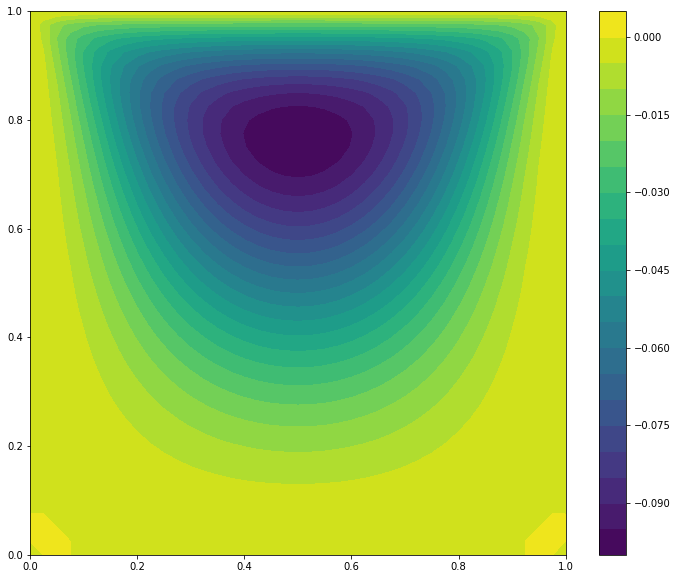

In [10]:
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)

pyplot.figure(figsize=(12,10))
pyplot.contourf(x,y,psi,20,cmap=cm.viridis);
pyplot.colorbar();